In [1]:
import sys
sys.path.insert(0, '../Results')
sys.path.insert(0, '../../src')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
from visualization_utils import perc, SetPlotRC, ApplyFont

In [2]:
if not os.path.exists("Figures"):
    os.mkdir("Figures")

# $\mu_W$ learning rate selection NN-Antisparse

50


<AxesSubplot:>

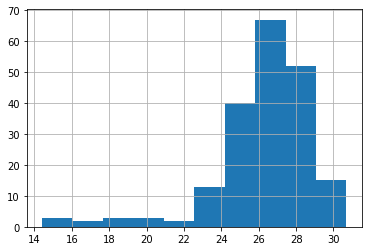

In [3]:
df_muW_results = pd.read_pickle(r"../Results/simulation_results_muWSelection.pkl")

print(df_muW_results.shape[0]//4)
df_muW_results = df_muW_results.iloc[:4*(df_muW_results.shape[0]//4)]
df_muW_results['SINR'].hist()

In [4]:
df_muW_results.loc[df_muW_results['SINR'] == -999]

,trial,seed,Model,muW,SINR,SINRlist,SNR,S,A,X,Wf,SNRinp,execution_time


In [5]:
results = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

results

,muW,count,SINR
0,0.005,50,23.748436
1,0.010,50,25.560601
2,0.030,50,27.297935
3,0.050,50,28.130805


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


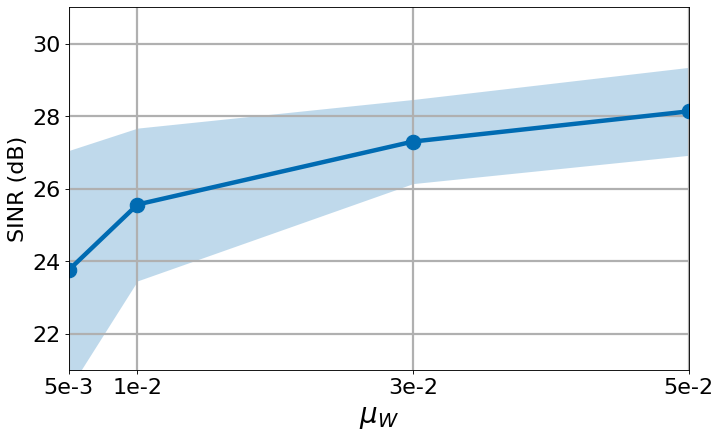

In [6]:
data= []
muW_list = [0.005, 0.01, 0.03, 0.05]
for muW__ in muW_list:
    data.append(df_muW_results.loc[df_muW_results['muW'] == muW__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

SINRresults = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

muW_list = np.array(SINRresults['muW'].values, dtype = np.float64)
SINR = np.array(SINRresults['SINR'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(muW_list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(muW_list,  SINR + std_data, SINR - std_data, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("$\mu_W$",fontsize=25)
plt.ylabel("SINR (dB)",fontsize=25)

plt.grid(linewidth=2)
plt.xticks(muW_list, ["5e-3", "1e-2", "3e-2", "5e-2"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([0.005, 0.05,21,31])

ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMax_NNAnti_muW_Ablation_uncorrelated.pdf', format='pdf')

50


<AxesSubplot:>

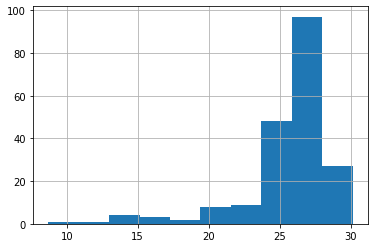

In [7]:
df_muW_results = pd.read_pickle(r"../Results/simulation_results_muWSelectionV2.pkl")#.iloc[:12]

print(df_muW_results.shape[0]//4)
df_muW_results = df_muW_results.iloc[:4*(df_muW_results.shape[0]//4)]
df_muW_results['SINR'].hist()

In [8]:
results = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

results

,muW,count,SINR
0,0.005,50,23.713536
1,0.010,50,25.595562
2,0.030,50,27.226801
3,0.050,50,25.878977


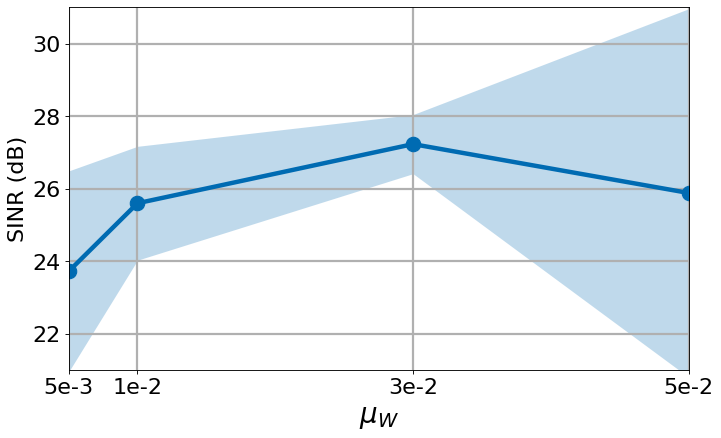

In [9]:
data= []
muW_list = [0.005, 0.01, 0.03, 0.05]
for muW__ in muW_list:
    data.append(df_muW_results.loc[df_muW_results['muW'] == muW__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

SINRresults = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

muW_list = np.array(SINRresults['muW'].values, dtype = np.float64)
SINR = np.array(SINRresults['SINR'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(muW_list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(muW_list,  SINR + std_data, SINR - std_data, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("$\mu_W$",fontsize=25)
plt.ylabel("SINR (dB)",fontsize=25)

plt.grid(linewidth=2)
plt.xticks(muW_list, ["5e-3", "1e-2", "3e-2", "5e-2"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([0.005, 0.05,21,31])

ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMax_NNAnti_muW_Ablation_correlated.pdf', format='pdf')

# $B_e$ Initialization NN-Antisparse

50


<AxesSubplot:>

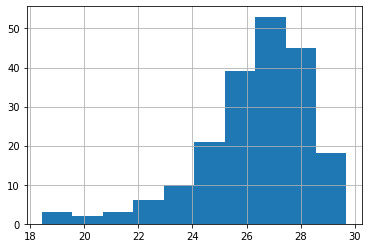

In [10]:
df_Be_results = pd.read_pickle(r"../Results/simulation_results_Be_Initialization.pkl")#.iloc[:12]

print(df_Be_results.shape[0]//4)
df_Be_results = df_Be_results.iloc[:4*(df_Be_results.shape[0]//4)]
df_Be_results['SINR'].hist()

In [11]:
results = df_Be_results[['Be_gain', 'SINR']].groupby(['Be_gain']).agg({'Be_gain':'size', 'SINR':'mean'}).rename(columns={'Be_gain':'count','SINR':'SINR'}).reset_index()

results

,Be_gain,count,SINR
0,1000,50,27.774535
1,2000,50,26.991486
2,5000,50,25.823978
3,10000,50,24.773708


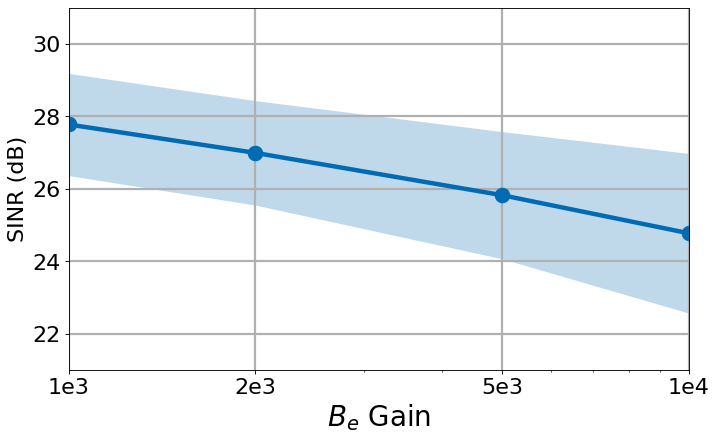

In [12]:
data= []
Be_gain_list = [1000, 2000, 5000, 10000]
for Be_gain in Be_gain_list:
    data.append(df_Be_results.loc[df_Be_results['Be_gain'] == Be_gain]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

SINRresults = df_Be_results[['Be_gain', 'SINR']].groupby(['Be_gain']).agg({'Be_gain':'size', 'SINR':'mean'}).rename(columns={'Be_gain':'count','SINR':'SINR'}).reset_index()

Be_gain_list = np.array(SINRresults['Be_gain'].values, dtype = np.float64)
SINR = np.array(SINRresults['SINR'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(Be_gain_list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(Be_gain_list,  SINR + std_data, SINR - std_data, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("$B_e$ Gain",fontsize=25)
plt.ylabel("SINR (dB)",fontsize=25)

plt.grid(linewidth=2)
plt.xticks(Be_gain_list, ["1e3", "2e3", "5e3", "1e4"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([1000, 10000,21,31])

ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMax_NNAnti_Be_Ablation_uncorrelated.pdf', format='pdf')

<AxesSubplot:>

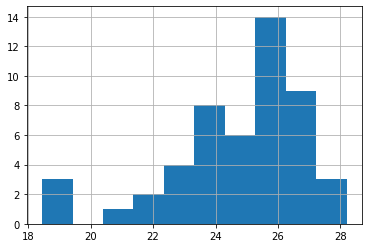

In [13]:
df_Be_results.loc[df_Be_results['Be_gain'] == 10000]['SINR'].hist()

50


<AxesSubplot:>

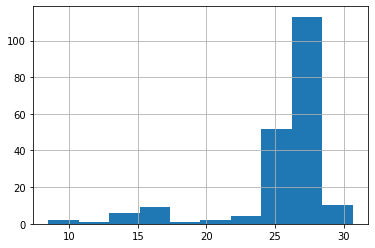

In [14]:
df_Be_results = pd.read_pickle(r"../Results/simulation_results_Be_InitializationV2.pkl")#.iloc[:12]

print(df_Be_results.shape[0]//4)
df_Be_results = df_Be_results.iloc[:4*(df_Be_results.shape[0]//4)]
df_Be_results['SINR'].hist()

In [15]:
results = df_Be_results[['Be_gain', 'SINR']].groupby(['Be_gain']).agg({'Be_gain':'size', 'SINR':'mean'}).rename(columns={'Be_gain':'count','SINR':'SINR'}).reset_index()

results

,Be_gain,count,SINR
0,1000,50,24.481333
1,2000,50,25.983574
2,5000,50,26.002629
3,10000,50,25.669991


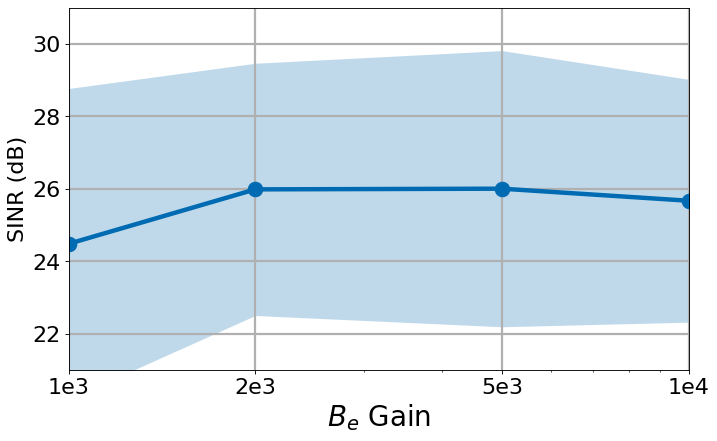

In [16]:
data= []
Be_gain_list = [1000, 2000, 5000, 10000]
for Be_gain in Be_gain_list:
    data.append(df_Be_results.loc[df_Be_results['Be_gain'] == Be_gain]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

SINRresults = df_Be_results[['Be_gain', 'SINR']].groupby(['Be_gain']).agg({'Be_gain':'size', 'SINR':'mean'}).rename(columns={'Be_gain':'count','SINR':'SINR'}).reset_index()

Be_gain_list = np.array(SINRresults['Be_gain'].values, dtype = np.float64)
SINR = np.array(SINRresults['SINR'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.semilogx(Be_gain_list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(Be_gain_list,  SINR + std_data, SINR - std_data, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("$B_e$ Gain",fontsize=25)
plt.ylabel("SINR (dB)",fontsize=25)

plt.grid(linewidth=2)
plt.xticks(Be_gain_list, ["1e3", "2e3", "5e3", "1e4"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([1000, 10000,21,31])

ApplyFont(plt.gca())
plt.savefig('Figures/CorInfoMax_NNAnti_Be_Ablation_correlated.pdf', format='pdf')

# $\mu_W$ learning rate selection Antisparse

33


<AxesSubplot:>

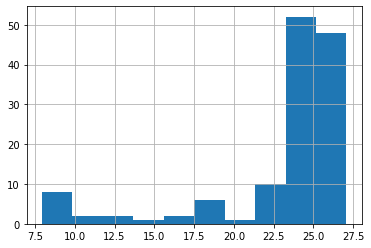

In [17]:
df_muW_results = pd.read_pickle(r"../Results/simulation_results_muWSelection_AntisparseV3.pkl")

print(df_muW_results.shape[0]//4)
df_muW_results = df_muW_results.iloc[:4*(df_muW_results.shape[0]//4)]
df_muW_results['SINR'].hist()

In [18]:
results = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

results

,muW,count,SINR
0,0.005,33,19.524754
1,0.010,33,22.577533
2,0.030,33,24.956138
3,0.050,33,24.726295


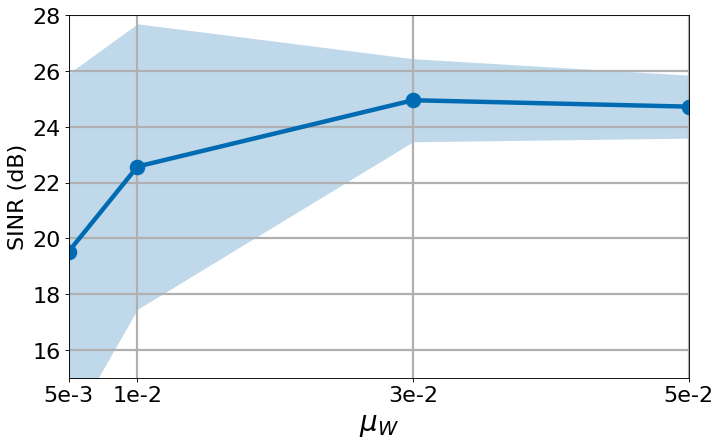

In [19]:
data= []
muW_list = [0.005, 0.01, 0.03, 0.05]
for muW__ in muW_list:
    data.append(df_muW_results.loc[df_muW_results['muW'] == muW__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

SINRresults = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

muW_list = np.array(SINRresults['muW'].values, dtype = np.float64)
SINR = np.array(SINRresults['SINR'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(muW_list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(muW_list,  SINR + std_data, SINR - std_data, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("$\mu_W$",fontsize=25)
plt.ylabel("SINR (dB)",fontsize=25)

plt.grid(linewidth=2)
plt.xticks(muW_list, ["5e-3", "1e-2", "3e-2", "5e-2"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([0.005, 0.05,15,28])

ApplyFont(plt.gca())


37


<AxesSubplot:>

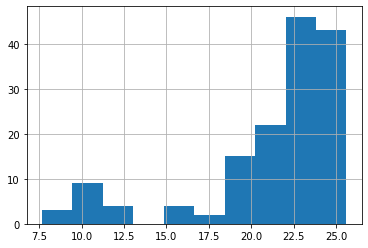

In [20]:
df_muW_results = pd.read_pickle(r"../Results/simulation_results_muWSelection_AntisparseV4.pkl")

print(df_muW_results.shape[0]//4)
df_muW_results = df_muW_results.iloc[:4*(df_muW_results.shape[0]//4)]
df_muW_results['SINR'].hist()

In [21]:
results = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

results

,muW,count,SINR
0,0.005,37,17.684597
1,0.010,37,21.370253
2,0.030,37,23.380180
3,0.050,37,22.486366


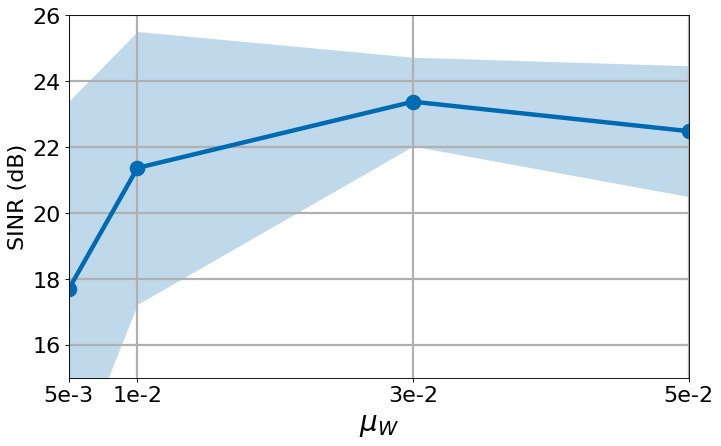

In [22]:
data= []
muW_list = [0.005, 0.01, 0.03, 0.05]
for muW__ in muW_list:
    data.append(df_muW_results.loc[df_muW_results['muW'] == muW__]['SINR'].values.tolist())
    
data = np.stack(data, axis = 1)

# compute the mean, 25/75 percentiles, and standard deviation
mean_, perc_25, perc_75, std_data = perc(data)

SINRresults = df_muW_results[['muW', 'SINR']].groupby(['muW']).agg({'muW':'size', 'SINR':'mean'}).rename(columns={'muW':'count','SINR':'SINR'}).reset_index()

muW_list = np.array(SINRresults['muW'].values, dtype = np.float64)
SINR = np.array(SINRresults['SINR'].values, dtype = np.float64)

SetPlotRC()
fh2=plt.figure(figsize=(10, 6), dpi=80)
plt.plot(muW_list, SINR,"-o", linewidth=4, markersize = 13,color='#006BB2')
plt.fill_between(muW_list,  SINR + std_data, SINR - std_data, alpha=0.25, linewidth=0, color='#006BB2')
plt.grid()
plt.xlabel("$\mu_W$",fontsize=25)
plt.ylabel("SINR (dB)",fontsize=25)

plt.grid(linewidth=2)
plt.xticks(muW_list, ["5e-3", "1e-2", "3e-2", "5e-2"])
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.axis([0.005, 0.05,15,26])

ApplyFont(plt.gca())


# $B_e$ Initialization Antisparse